In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customer_file = r"D:\Data Analytics\Python\Case Study\Case Study\Case Study 1 - Retail Case Study\Customer.csv"
prod_cat_info_file = r"D:\Data Analytics\Python\Case Study\Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv" 
transactions_file = r"D:\Data Analytics\Python\Case Study\Case Study\Case Study 1 - Retail Case Study\Transactions.csv"

customer_df = pd.read_csv(customer_file)
prod_cat_info_df = pd.read_csv(prod_cat_info_file)
transactions_df = pd.read_csv(transactions_file)


Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customer_final = pd.merge(transactions_df, prod_cat_info_df, 
                          how='left', 
                          left_on=['prod_cat_code', 'prod_subcat_code'], 
                          right_on=['prod_cat_code', 'prod_sub_cat_code'])

customer_final = pd.merge(customer_final, customer_df, 
                          how='inner', 
                          left_on='cust_id', 
                          right_on='customer_Id')

print(customer_final)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type    

 2. Prepare a summary report for the merged data set.
 a. Get the column names and their corresponding data types
 b. Top/Bottom 10 observations
 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
 d. Frequency tables for all the categorical variables

In [3]:
print("Column Names and Data Types:\n", customer_final.dtypes)

print("\nTop 10 Observations:\n", customer_final.head(10))
print("\nBottom 10 Observations:\n", customer_final.tail(10))

continuous_cols = customer_final.select_dtypes(include=['number']).columns
print("\nFive-Number Summary:\n", customer_final[continuous_cols].describe().transpose())

categorical_cols = customer_final.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrequency Table for {col}:\n", customer_final[col].value_counts())

Column Names and Data Types:
 transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

Top 10 Observations:
    transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014  

3.Generate histograms for all continuous variables and frequency bars for categorical variables.


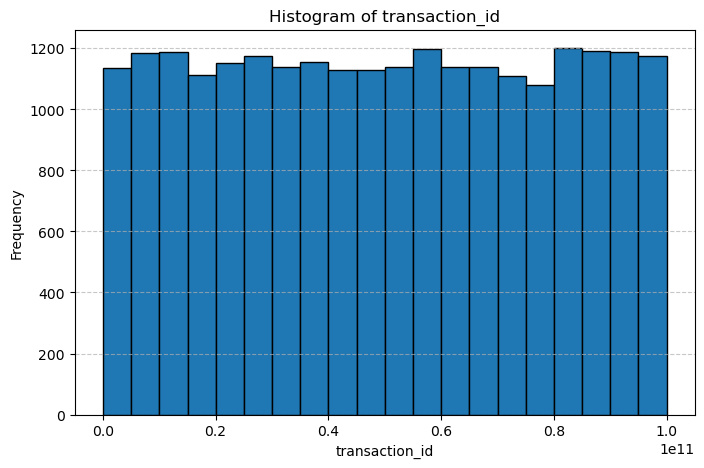

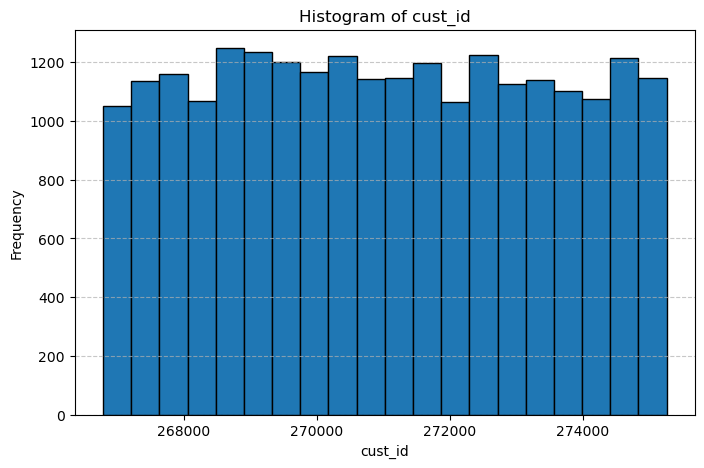

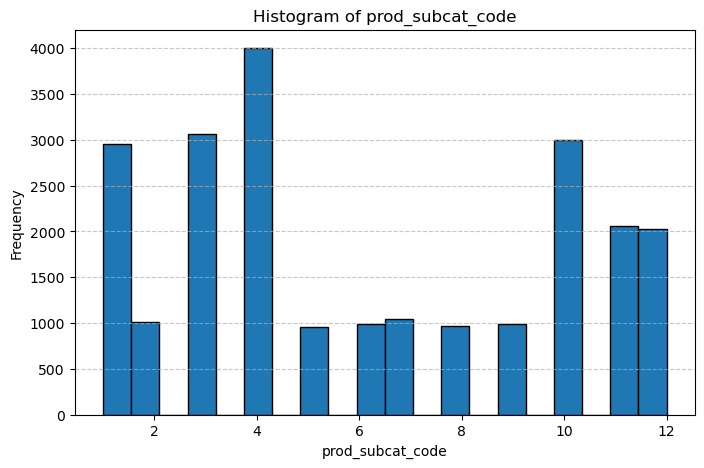

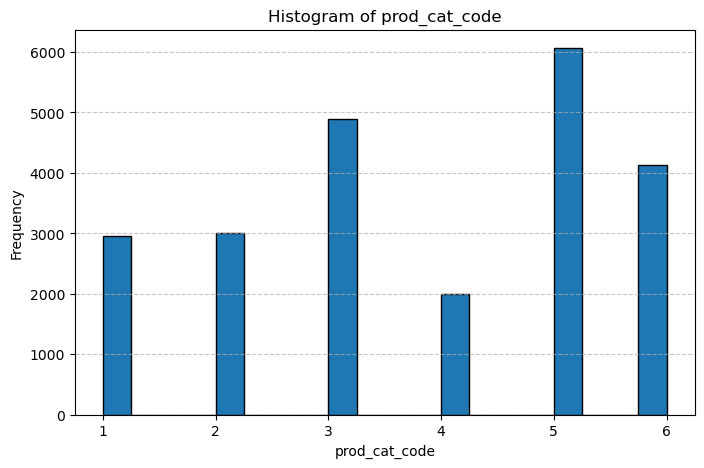

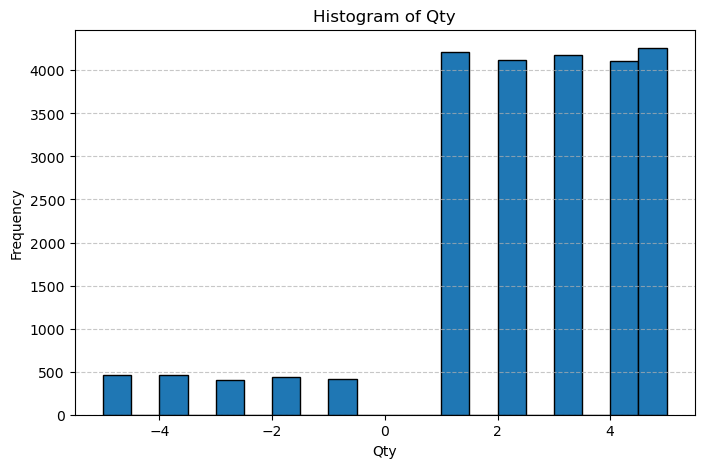

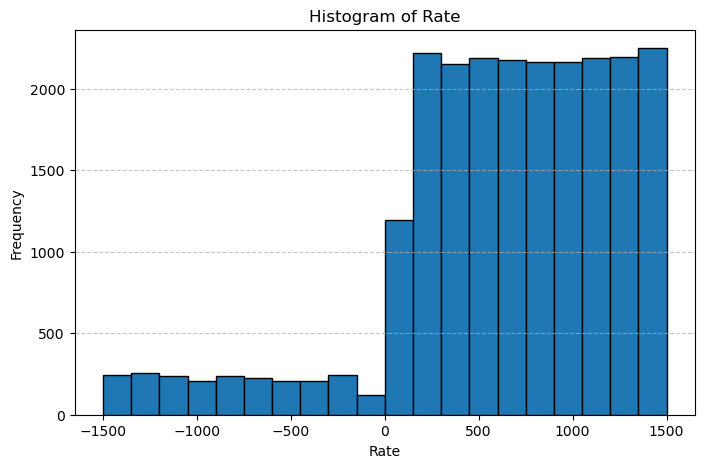

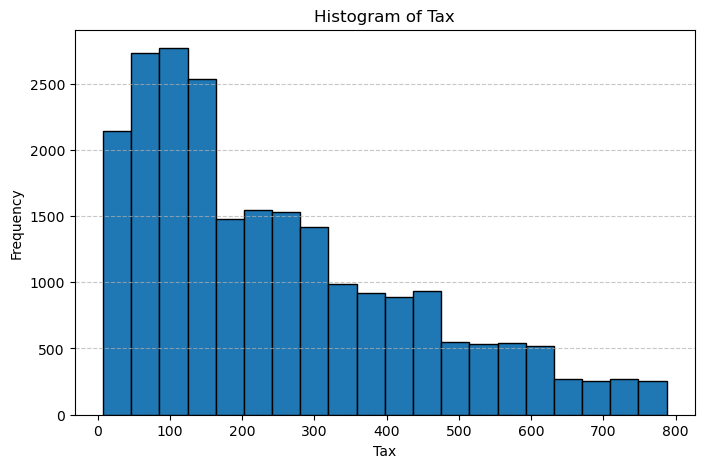

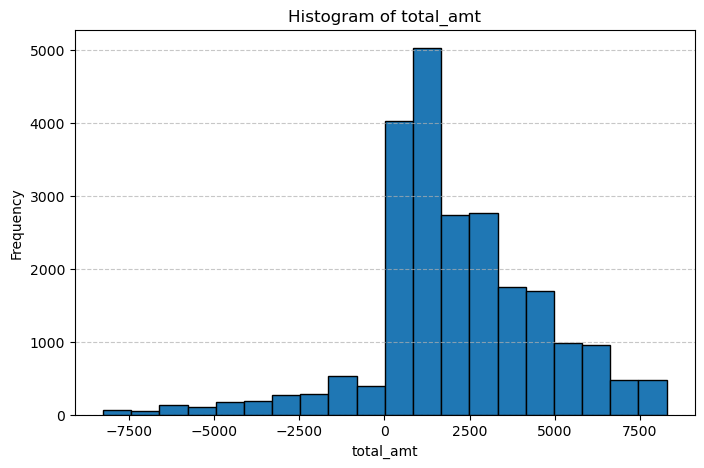

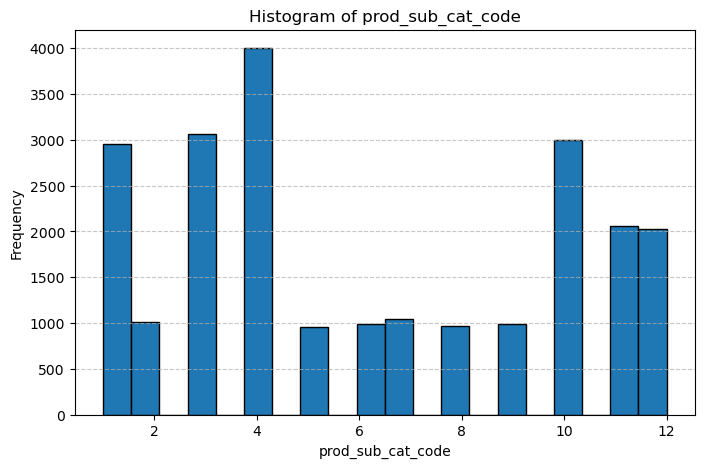

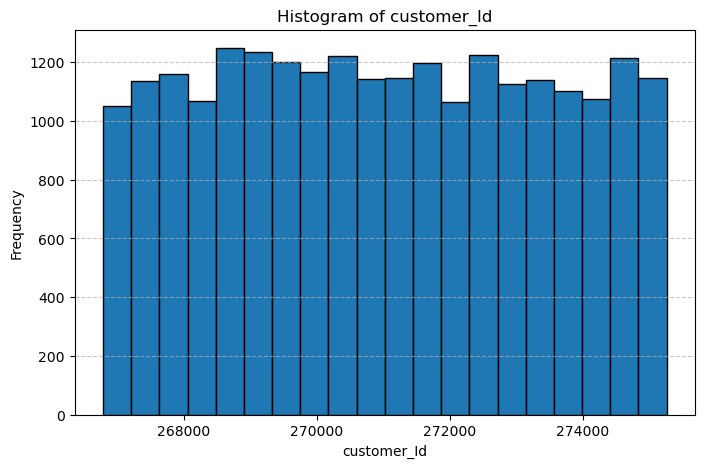

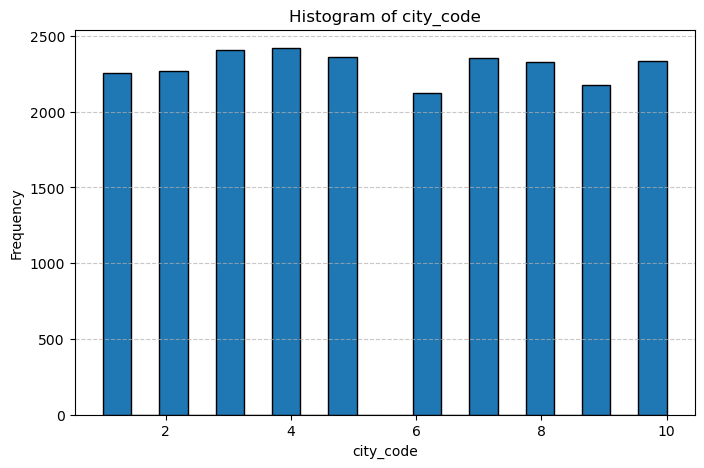

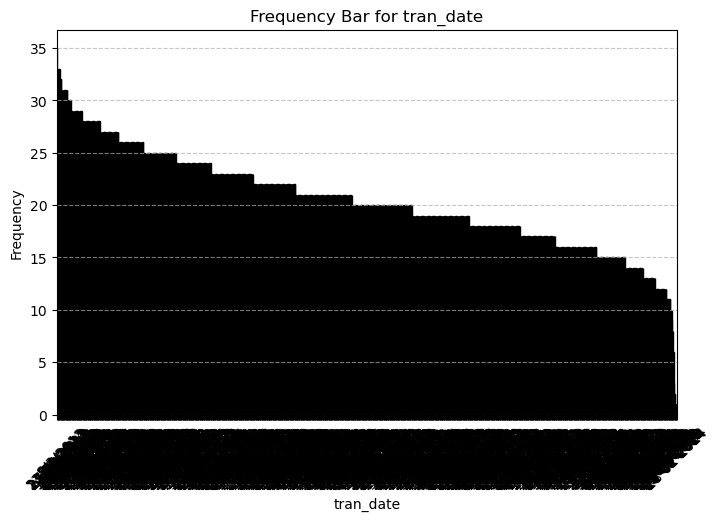

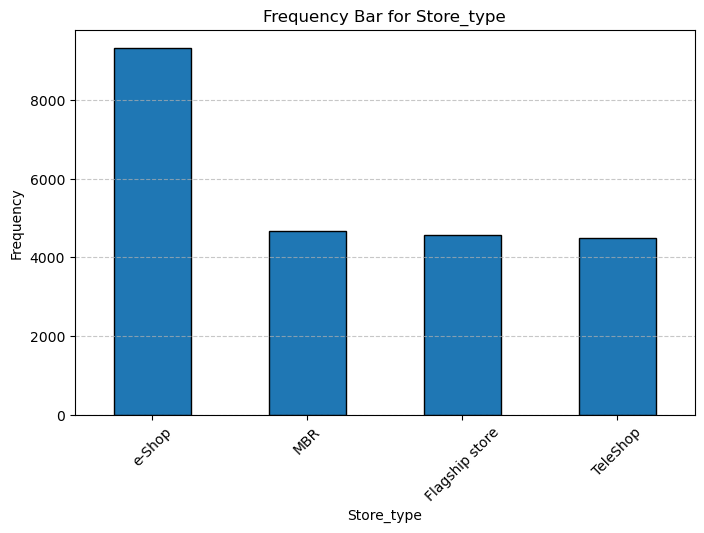

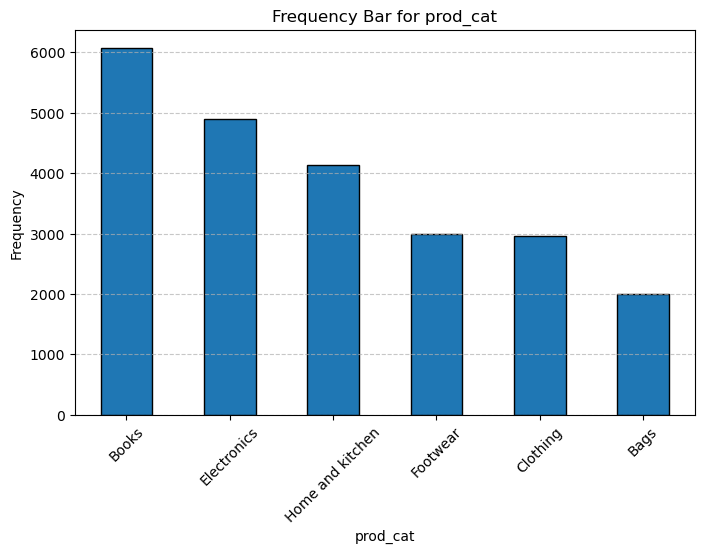

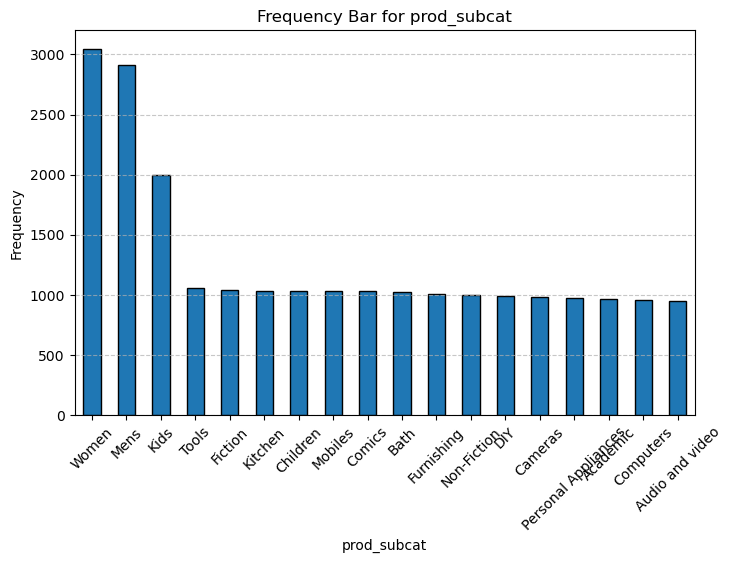

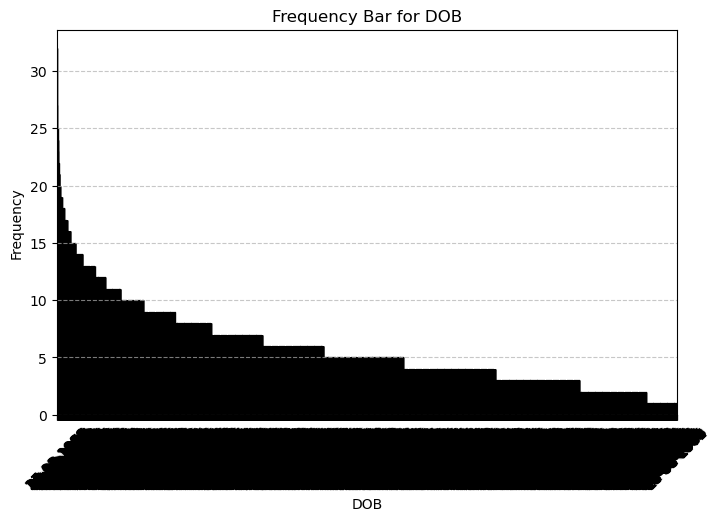

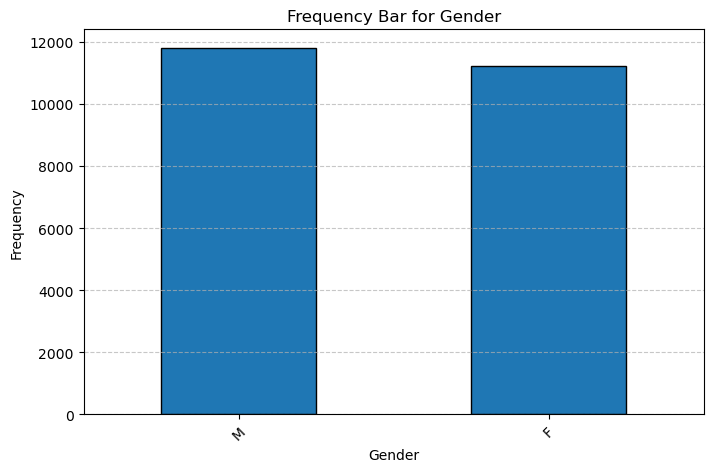

In [4]:
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(customer_final[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    customer_final[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"Frequency Bar for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 b. Count of transactions where the total amount of transaction was negative

In [ ]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], errors='coerce')
time_period = (customer_final['tran_date'].min(), customer_final['tran_date'].max())
print("\nTime Period:", time_period)


In [ ]:
negative_transactions_count = customer_final[customer_final['total_amt'] < 0].shape[0]
print("\nCount of Transactions with Negative Total Amount:", negative_transactions_count)

 5. Analyze which product categories are more popular among females vs male customers.


In [28]:
popular_categories = customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().unstack()
print("\nPopular Product Categories by Gender:\n", popular_categories)


Popular Product Categories by Gender:
 prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen
Gender                                                                  
F         2362   7070      3425         5832      3716              4895
M         2346   7587      3748         6476      3555              5041


6.Which City code has the maximum customers and what was the percentage of customers from 
that city?

In [29]:
city_counts = customer_final['city_code'].value_counts()
max_city = city_counts.idxmax()
max_city_percentage = (city_counts[max_city] / city_counts.sum()) * 100
print(f"\nCity with Maximum Customers: {max_city} ({max_city_percentage:.2f}%)")


City with Maximum Customers: 4.0 (10.51%)


7. Which store type sells the maximum products by value and by quantity?

In [15]:
store_sales = customer_final.groupby('Store_type')[['Qty', 'total_amt']].sum()
print("\nStore Type Sales by Value and Quantity:\n", store_sales)


Store Type Sales by Value and Quantity:
                   Qty     total_amt
Store_type                         
Flagship store  11133  9.715688e+06
MBR             11194  9.674486e+06
TeleShop        10984  9.364781e+06
e-Shop          22763  1.982482e+07


8.What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?

In [16]:
earned_flagship = customer_final[(customer_final['prod_cat'].isin(['Electronics', 'Clothing'])) & 
                                 (customer_final['Store_type'] == 'Flagship store')]['total_amt'].sum()
print("\nTotal Earned from Electronics and Clothing in Flagship Stores:", earned_flagship)


Total Earned from Electronics and Clothing in Flagship Stores: 3409559.27


9.What was the total amount earned from "Male" customers under the "Electronics" category?

In [17]:
male_electronics = customer_final[(customer_final['prod_cat'] == 'Electronics') & 
                                   (customer_final['Gender'] == 'M')]['total_amt'].sum()
print("\nTotal Earned from Male Customers in Electronics:", male_electronics)


Total Earned from Male Customers in Electronics: 5703109.424999999


10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

In [18]:
positive_transactions = customer_final[customer_final['total_amt'] > 0]
unique_transactions = positive_transactions.groupby('cust_id')['transaction_id'].nunique()
high_transaction_customers = unique_transactions[unique_transactions > 10].count()
print("\nNumber of Customers with More Than 10 Unique Transactions:", high_transaction_customers)


Number of Customers with More Than 10 Unique Transactions: 6


11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [20]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
customer_final['Age'] = (pd.Timestamp('now') - customer_final['DOB']).dt.days // 365
age_filtered = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]
amount_spent_25_35 = age_filtered[age_filtered['prod_cat'].isin(['Electronics', 'Books'])]['total_amt'].sum()
print("\nTotal Amount Spent by 25-35 Age Group in Electronics and Books:", amount_spent_25_35)


Total Amount Spent by 25-35 Age Group in Electronics and Books: 4028797.955


In [21]:
jan_mar_2014 = age_filtered[(age_filtered['tran_date'] >= '2014-01-01') & 
                             (age_filtered['tran_date'] <= '2014-03-01')]['total_amt'].sum()
print("\nTotal Amount Spent by 25-35 Age Group (Jan-Mar 2014):", jan_mar_2014)


Total Amount Spent by 25-35 Age Group (Jan-Mar 2014): 0.0
